In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

In [30]:
# Improtação dos datasets que serão utilizados
df_1 = pd.read_csv('https://raw.githubusercontent.com/Rogeriom49/sexism_analysis/refs/heads/main/datasets/dev.csv')
df_2 = pd.read_csv('https://raw.githubusercontent.com/Rogeriom49/sexism_analysis/refs/heads/main/datasets/test%20(1).csv')
df_3 = pd.read_csv('https://raw.githubusercontent.com/Rogeriom49/sexism_analysis/refs/heads/main/datasets/train%20(2).csv')

In [31]:
# Concatenação dos dataframes
df = pd.concat([df_1, df_2, df_3])
df.head()

,rewire_id,text,label_sexist,label_category,label_vector,split
0,sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape ...",not sexist,none,none,dev
1,sexism2022_english-966,I bet she wished she had a gun,not sexist,none,none,dev
2,sexism2022_english-3553,I agree with that but at the same time I know ...,sexist,2. derogation,2.1 descriptive attacks,dev
3,sexism2022_english-13328,democrats from Minnesota (leftist muzzie shith...,sexist,2. derogation,2.2 aggressive and emotive attacks,dev
4,sexism2022_english-81,Texas jury sentences Jordanian immigrant to de...,not sexist,none,none,dev


In [32]:
# Informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       20000 non-null  object
 1   text            20000 non-null  object
 2   label_sexist    20000 non-null  object
 3   label_category  20000 non-null  object
 4   label_vector    20000 non-null  object
 5   split           20000 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [33]:
df['label'] = df['label_sexist'].map({'not sexist': 0, 'sexist': 1})
df.head()

,rewire_id,text,label_sexist,label_category,label_vector,split,label
0,sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape ...",not sexist,none,none,dev,0
1,sexism2022_english-966,I bet she wished she had a gun,not sexist,none,none,dev,0
2,sexism2022_english-3553,I agree with that but at the same time I know ...,sexist,2. derogation,2.1 descriptive attacks,dev,1
3,sexism2022_english-13328,democrats from Minnesota (leftist muzzie shith...,sexist,2. derogation,2.2 aggressive and emotive attacks,dev,1
4,sexism2022_english-81,Texas jury sentences Jordanian immigrant to de...,not sexist,none,none,dev,0


In [34]:
# Preprocessamento dos dados
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, maxlen=max_len)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(padded, df['label'], test_size=0.2, random_state=42)

In [36]:
# Definição do modelo
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    SpatialDropout1D(0.2),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_4             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.7447 - loss: 0.5589 - val_accuracy: 0.8338 - val_loss: 0.4090
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.8506 - loss: 0.3664 - val_accuracy: 0.8497 - val_loss: 0.3862
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.8966 - loss: 0.2686 - val_accuracy: 0.8485 - val_loss: 0.4252
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.9180 - loss: 0.2157 - val_accuracy: 0.8365 - val_loss: 0.4798
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9414 - loss: 0.1618 - val_accuracy: 0.8273 - val_loss: 0.5034


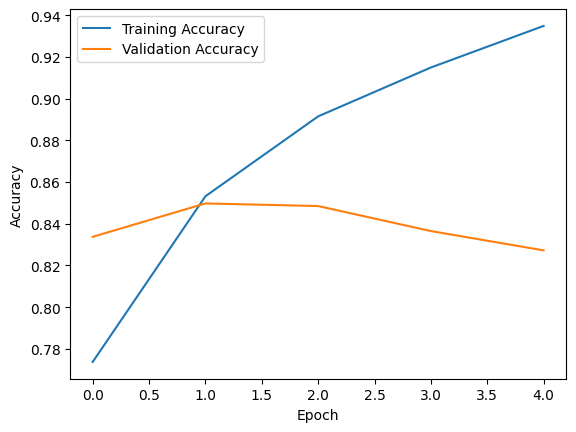

In [38]:
# Gráficos de treinamento e validação
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [39]:
# Avaliação do modelo
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Accuracy: ", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Accuracy:  0.82725
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      3028
           1       0.68      0.54      0.60       972

    accuracy                           0.83      4000
   macro avg       0.77      0.73      0.75      4000
weighted avg       0.82      0.83      0.82      4000

